In [1]:
# `한글 지원 라이브러리 설치`

!pip install koreanize-matplotlib
import koreanize_matplotlib

## chromedriver 뉴스기사 크롤링

https://somjang.tistory.com/entry/MAC-OSX-개발자를-확인할-수-없기-때문에-chromedriver을를-열-수-없습니다-해결-방법

### 사용할 날짜 리스트

In [ ]:
# 연도
year = ['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']

# 월
month = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']

# 1~8일   # 9~15일   # 16~23일   # 24~31일
start_d = ["01", "09", "16", "24"]
end_d = ["08", "15", "23", "31"]

# 총 480개 조합

### 최종 크롤링 코드

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
import urllib.parse
import time
import pandas as pd

# 데이터프레임 리스트 초기화
all_data = []

#####################################################
# 검색어, 연도, 월 설정
text = "속보 노벨"
year = ['2024']
month = ['10']
#####################################################

# ChromeDriver 경로 설정
driver_path = "/Users/leesangwon/Desktop/chromedriver-mac-arm64/chromedriver"  # 여기에 ChromeDriver의 경로를 입력
service = Service(driver_path)

# 웹드라이버 초기화
driver = webdriver.Chrome(service=service)

# 연도, 월을 순회하며 크롤링
for y in year:
    for m in month:
        # 월의 마지막 날짜 계산
        if m == '01' or m == '03' or m == '05' or m == '07' or m == '08' or m == '10' or m == '12':
            last_day = 31
        elif m == '04' or m == '06' or m == '09' or m == '11':
            last_day = 30
        else:  # 2월 (윤년은 29일)
            last_day = 29

        # 하루 단위로 크롤링
        for day in range(1, last_day + 1):
            start_d = str(day).zfill(2)  # 01, 02, ..., 31 형태로 만들어줌
            end_d = start_d  # 하루 단위로 크롤링하므로 시작일과 종료일이 같음

            # URL 생성
            encoded_text = urllib.parse.quote(text)  # 검색어를 url 인코딩
            url = f"https://search.naver.com/search.naver?where=news&query={encoded_text}&sm=tab_opt&sort=0&photo=0&field=0&pd=3&ds={y}.{m}.{start_d}&de={y}.{m}.{end_d}&docid=&related=0&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so%3Ar%2Cp%3Afrom{y}{m}{start_d}to{y}{m}{end_d}&is_sug_officeid=0&office_category=0&service_area=0"

            # 페이지 열기
            driver.get(url)

            # 스크롤 1~2번 내리기
            last_height = driver.execute_script("return document.body.scrollHeight")
            for _ in range(10):  # 1~2번 스크롤 내리기
                driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
                time.sleep(1.5)
                new_height = driver.execute_script("return document.body.scrollHeight")
                if new_height == last_height:
                    break
                last_height = new_height

            # 기사 제목, 날짜, 스크립트 크롤링
            titles = driver.find_elements(By.CSS_SELECTOR, ".news_tit")
            dates = driver.find_elements(By.CSS_SELECTOR, ".info_group > span")
            scripts = driver.find_elements(By.CSS_SELECTOR, ".dsc_txt_wrap")
            press = driver.find_elements(By.CSS_SELECTOR, ".info_group > a.press")

            # 상위 20개 기사만 저장
            for title, date, script, p in zip(titles[:30], dates[:30], scripts[:30], press[:30]):
                all_data.append({
                    "Title": title.text,
                    "Date": date.text,
                    "Press": p.text,
                    "Description": script.text
                })

# 데이터프레임 생성 및 저장
df1 = pd.DataFrame(all_data)
df1.to_csv(f"/Users/leesangwon/Downloads/{text}_{month}월_news_data.csv", index=False)

# 드라이버 종료
driver.quit()

In [7]:
import pandas as pd
df = pd.read_csv('/Users/leesangwon/Downloads/속보 한강 노벨문학상_[10]월_news_data.csv')

date_group = df.groupby('Date').size().reset_index(name='Count')
date_group.head()

,Date,Count
0,18면 1단,2
1,2024.10.10.,29
2,2024.10.11.,28
3,2024.10.12.,6
4,2024.10.13.,7


/var/folders/pr/m3xbr9vs3xs6h2gphc6hflsm0000gn/T/ipykernel_96018/1120868250.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  date_group['Date'] = pd.to_datetime(date_group['Date'], errors='coerce')
/var/folders/pr/m3xbr9vs3xs6h2gphc6hflsm0000gn/T/ipykernel_96018/1120868250.py:15: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  plt.tight_layout()
/var/folders/pr/m3xbr9vs3xs6h2gphc6hflsm0000gn/T/ipykernel_96018/1120868250.py:15: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  plt.tight_layout()
/var/folders/pr/m3xbr9vs3xs6h2gphc6hflsm0000gn/T/ipykernel_96018/1120868250.py:15: UserWarning: Glyph 54943 (\N{HANGUL SYLLABLE HOES}) missing from current font.
  plt.tight_layout()
/var/folders/pr/m3xbr9vs3xs6h2gphc6hflsm0000gn/T/ipykernel_96018/1120868250.py:15: UserWarning: Glyph 49688 (\N{HA

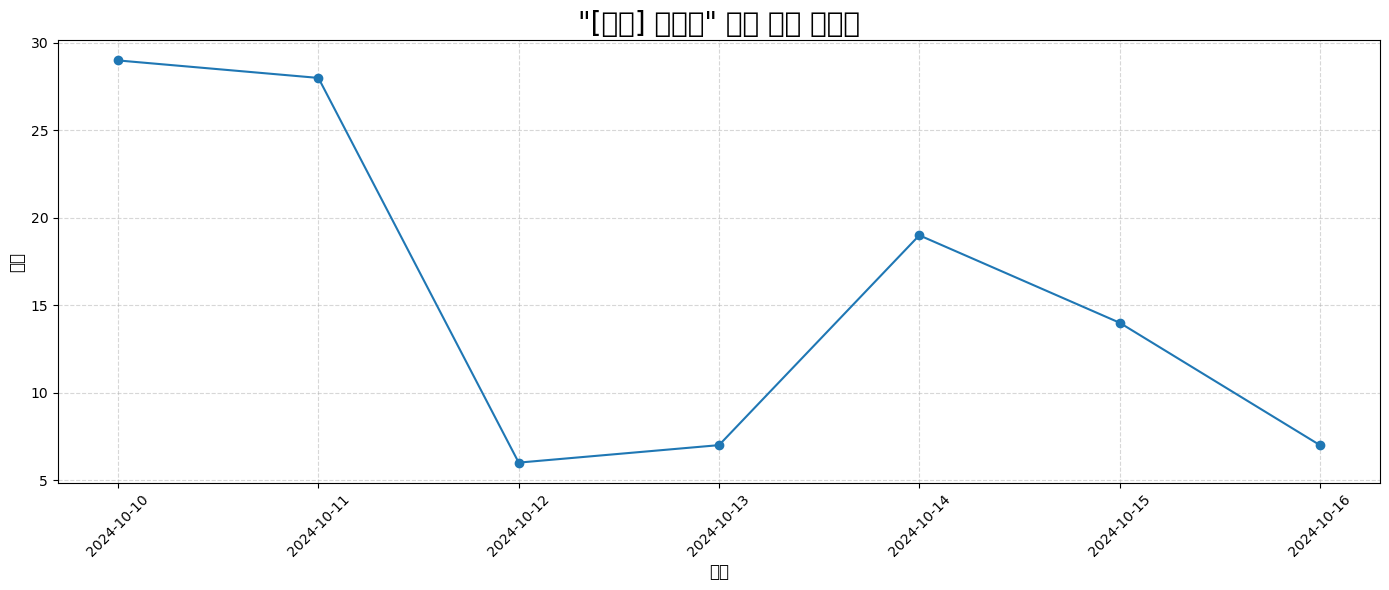

In [8]:
import matplotlib.pyplot as plt

# 날짜 데이터를 시계열로 변환
date_group['Date'] = pd.to_datetime(date_group['Date'], errors='coerce')
date_group = date_group.dropna(subset=['Date'])  # 변환에 실패한 날짜 제거

# 꺾은선 그래프 시각화
plt.figure(figsize=(14, 6))
plt.plot(date_group['Date'], date_group['Count'], marker='o')
plt.title('"[속보] 우크라" 일별 보도 빈도수', fontsize=20)
plt.xlabel('일자', fontsize=12)
plt.ylabel('횟수', fontsize=12)
plt.xticks(rotation=45)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 관련 기사 급증하는 일자 특정

In [3]:
import pandas as pd
df = pd.read_csv('/Users/leesangwon/Downloads/news_data_2.csv')
df

,Title,Date,Press,Description
0,"[속보] 미·러, '우크라 사태' 안보 협상 '타결'",2022.01.11.,천지일보,"미·러, '우크라 사태' 안보 협상 '타결' 천지일보"
1,중·러 견제 동맹결집 집중… 미사일 위협에도 대북정책 뒷전 [심층기획...,A8면 1단,세계일보언론사 선정,"바이든, 美 우선주의 지우기 초점 우크라 사태·인도태평양 갈등에 나토·오커스 등 동..."
2,"[속보] 바이든 ""우크라 침공은 러시아에 재앙""…강력제재 경고",2022.01.18.,신아일보,"바이든 ""우크라 침공은 러시아에 재앙""…강력제재 경고"
3,"[속보] 美, 우크라 미 대사관 직원 가족에 철수 명령",2022.01.24.,국민일보언론사 선정,미국 정부가 우크라이나의 미국대사관 직원 가족에게 철수 명령을 내렸다고 AP통신과 ...
4,"[속보] 美 ""러, 우크라 겨냥 상당 규모 '군사행동 계획' 보고 있어""",2022.01.24.,천지일보,"[속보] 美 ""러, 우크라 겨냥 상당 규모 '군사행동 계획' 보고 있어"" 천지일보"
...,...,...,...,...
267,"[속보] 젤렌스키 우크라 대통령, 尹과 통화후 트윗에 올린 글",2022.03.29.,중앙일보언론사 선정,윤석열 20대 대통령 당선인이 볼로디미르 젤렌스키 우크라이나 대통령과 전화통화를 했...
268,[속보] 우크라-러시아 5차 협상 끝나,2022.03.29.,천지일보,우크라-러시아 5차 협상 끝나 천지일보
269,[속보]전쟁 끝나나…러시아 “‘두 발’ 양보하고 있다”,2022.03.29.,서울신문언론사 선정,터키 이스탄불에서 열린 러시아와 우크라이나 간 5차 평화협상이 종료됐다. 양측 대표...
270,"[속보] 러시아 본토 무기고 폭발, 우크라 미사일 공격 추정 (영상)",2022.03.30.,서울신문,29일(이하 현지시간) 우크라이나 매체 ‘포커스’는 러시아 서부 벨고로드 외곽의 한...


In [4]:
date_group = df.groupby('Date').size().reset_index(name='Count')
date_group.head()

,Date,Count
0,2022.01.11.,1
1,2022.01.18.,1
2,2022.01.24.,4
3,2022.02.05.,1
4,2022.02.06.,2


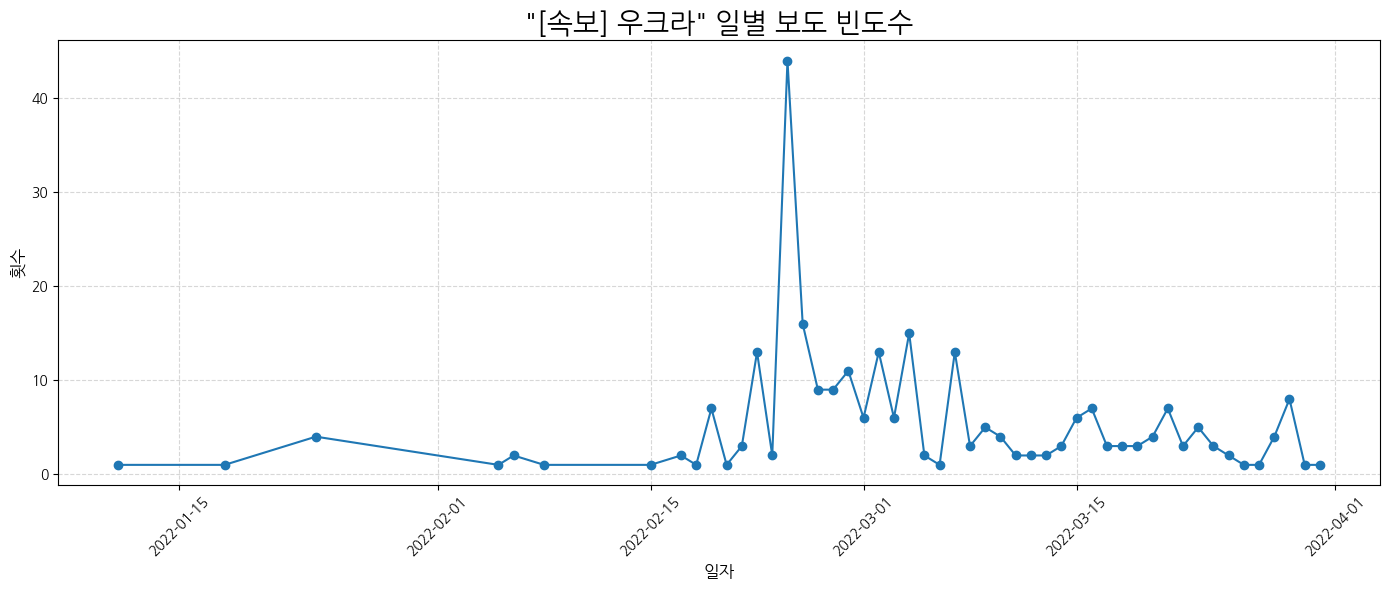

In [7]:
import matplotlib.pyplot as plt

# 날짜 데이터를 시계열로 변환
date_group['Date'] = pd.to_datetime(date_group['Date'], errors='coerce')
date_group = date_group.dropna(subset=['Date'])  # 변환에 실패한 날짜 제거

# 꺾은선 그래프 시각화
plt.figure(figsize=(14, 6))
plt.plot(date_group['Date'], date_group['Count'], marker='o')
plt.title('"[속보] 우크라" 일별 보도 빈도수', fontsize=20)
plt.xlabel('일자', fontsize=12)
plt.ylabel('횟수', fontsize=12)
plt.xticks(rotation=45)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [227]:
# 2022년 2월 24일 뉴스 보도가 급증했음 = 러시아의 침공날짜!
# 보도가 나온 날짜 vs. 보도가 떠들석하다가 점점 사그라드는 시점(약 3월 7일 정도)의 주식 수익률을 알아보자

# 특정된 일자 기준으로 주가 수익률 확인 및 라벨링

In [8]:
import yfinance as yf

start = '2022-02-15'
end = '2022-03-15'

tickers = pd.read_csv(f'/Users/leesangwon/Downloads/kospi200_tickers_241111.csv', encoding="CP949")
# 티커 칼럼 리스트화
tickers_list = tickers['티커'].tolist() if '티커' in tickers.columns else tickers.iloc[:, 0].tolist()
symbol = tickers_list

stock = yf.download(symbol, start, end)
stock = stock['Adj Close']

stock

[*********************100%***********************]  202 of 202 completed

4 Failed downloads:
['457190.KS', '450080.KS', '489790.KS', '454910.KS']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2022-02-15 -> 2022-03-15) (Yahoo error = "Data doesn\'t exist for startDate = 1644850800, endDate = 1647270000")')


Ticker,000080.KS,000100.KS,000120.KS,000150.KS,000210.KS,000240.KS,000270.KS,000660.KS,000670.KS,000720.KS,...,373220.KS,375500.KS,377300.KS,383220.KS,402340.KS,450080.KS,454910.KS,457190.KS,489790.KS,^KS11
Date,,,,,,,,,,,,,,,,,,,,,
2022-02-15 00:00:00+00:00,31353.052734,49917.644531,120849.632812,82645.695312,53747.910156,12032.377930,70153.242188,123415.570312,620617.0625,39659.300781,...,451500.0,53496.164062,127500.0,170736.578125,51700.0,NaN,NaN,NaN,NaN,2676.540039
2022-02-16 00:00:00+00:00,31955.105469,51170.058594,122335.484375,84379.531250,54616.367188,12122.507812,71870.914062,126816.781250,624477.8125,40383.890625,...,455500.0,54455.738281,132500.0,167438.250000,54700.0,NaN,NaN,NaN,NaN,2729.679932
2022-02-17 00:00:00+00:00,32186.662109,50633.308594,121840.195312,84957.468750,55581.320312,12077.443359,71870.914062,129246.226562,618686.6875,40625.421875,...,454500.0,55655.203125,133500.0,163169.843750,54200.0,NaN,NaN,NaN,NaN,2744.090088
2022-02-18 00:00:00+00:00,32696.091797,50543.847656,123326.054688,92952.335938,59248.144531,12212.638672,71147.679688,127788.562500,626408.1875,40625.421875,...,454500.0,57334.453125,140000.0,163557.890625,54200.0,NaN,NaN,NaN,NaN,2744.520020
2022-02-21 00:00:00+00:00,32696.091797,50543.847656,123326.054688,92952.335938,59248.144531,12212.638672,71147.679688,127788.562500,626408.1875,40625.421875,...,453000.0,59493.492188,140500.0,160259.562500,55800.0,NaN,NaN,NaN,NaN,2743.800049
2022-02-22 00:00:00+00:00,32696.091797,50543.847656,123326.054688,92952.335938,59248.144531,12212.638672,71147.679688,127788.562500,626408.1875,40625.421875,...,440000.0,59493.492188,139000.0,160259.562500,55800.0,NaN,NaN,NaN,NaN,2706.790039
2022-02-23 00:00:00+00:00,32696.091797,50543.847656,123326.054688,92952.335938,59248.144531,12212.638672,71147.679688,127788.562500,626408.1875,40625.421875,...,440000.0,59493.492188,139500.0,160259.562500,55800.0,NaN,NaN,NaN,NaN,2719.530029
2022-02-24 00:00:00+00:00,32927.652344,50186.019531,122335.484375,92085.421875,57607.726562,11761.988281,66356.289062,119042.578125,637025.2500,40866.949219,...,416500.0,58533.921875,135000.0,158707.421875,55300.0,NaN,NaN,NaN,NaN,2648.800049
2022-02-25 00:00:00+00:00,32973.964844,50633.308594,122335.484375,101139.843750,57318.242188,11942.248047,66717.906250,119528.453125,629303.7500,41156.789062,...,420000.0,59253.601562,144000.0,163557.890625,57300.0,NaN,NaN,NaN,NaN,2676.760010


In [9]:
# 인덱스를 datetime 형식으로 변환
stock.index = pd.to_datetime(stock.index)

before = stock.loc["2022-02-24"]
after = stock.loc["2022-03-07"]

# 수익률 계산
returns = round((after - before) / before * 100, 3)

# 수익률 데이터를 데이터프레임으로 변환
returns_df = pd.DataFrame(returns, columns=["Return"])

# 인덱스를 칼럼으로 변환하여 "Ticker"라는 새 칼럼 생성
returns_df.reset_index(inplace=True)
returns_df.rename(columns={"index": "Ticker"}, inplace=True)

# 티커와 종목명 간의 매핑 딕셔너리 생성
ticker_to_name = dict(zip(tickers['티커'], tickers['종목명']))

# 티커를 종목명으로 대치
returns_df["Ticker"] = returns_df["Ticker"].map(ticker_to_name)

# 수익률을 내림차순으로 정렬
returns_df.sort_values(by="Return", ascending=False, inplace=True)

# 결과 출력
returns_df

,Ticker,Return
159,덴티움,31.204
3,두산,25.523
150,씨에스윈드,25.192
24,세아제강지주,22.936
137,LIG넥스원,21.746
...,...,...
155,메리츠금융지주,-14.805
197,에코프로머티,NaN
198,두산로보틱스,NaN
199,이수스페셜티케미컬,NaN


In [13]:
a = returns_df.loc[returns_df["Ticker"] == "카카오"]
a

,Ticker,Return
111,카카오,1.778


In [218]:
driver.quit()

In [197]:
import time
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains

# 페이지 끝까지 스크롤
last_height = driver.execute_script("return document.body.scrollHeight")
while True:
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(2)  # 페이지가 로드되도록 대기
    new_height = driver.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        break
    last_height = new_height

# 기사 제목, 날짜, 스크립트 크롤링
titles = driver.find_elements(By.CSS_SELECTOR, ".news_tit")  # 기사 제목
dates = driver.find_elements(By.CSS_SELECTOR, ".info_group > span")  # 기사 날짜
scripts = driver.find_elements(By.CSS_SELECTOR, ".dsc_txt_wrap")  # 기사 요약

# 데이터 저장
data = []
for title, date, script in zip(titles, dates, scripts):
    data.append({
        "Title": title.text,
        "Date": date.text,
        "Description": script.text
    })

# 데이터프레임 생성
df = pd.DataFrame(data)
df

,Title,Date,Description
0,"[속보] 우크라 ""러, 지난해 12월부터 北탄도미사일 최소 24발 발사""",2024.02.16.,우크라이나가 지난해 12월 30일 이후 러시아가 발사한 탄도미사일 중 최소 24발이...
1,"[속보] 美 ""러시아 겨냥 500여개 신규 제재""…나발니 사망·우크라 전쟁",2024.02.23.,미국이 러시아의 우크라이나 침공 2주년을 맞아 러시아에 대규모 제재를 부과했다. 특...
2,"[속보] 젤렌스키 ""우크라 군인 3만1000명 사망""... 전쟁 후 첫 언급",2024.02.26.,"러시아의 우크라이나 침공 2년, 우크라이나와 이웃국가의 삶과 변화를 들여다봤다. 볼..."
